## Часть 1
Напишите скрипт, который скачивает все данные с выборов губернатора СПб 2019г для всех избирательных участков. 

Входная точка [по ссылке](http://notelections.online/region/region/st-petersburg?action=show&root=1&tvd=27820001217417&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217417&type=222). Затем нужно перейти на сайты территориальных избирательных комиссий. Результаты нужно сохранить в  `cvs`-файл, `sqlite` базе данных или `parquet`-файле. В итоге должна получиться таблица с полями:
- название ТИК (территориальная избирательная комиссия, некоторое объединение избирательных участков на определенной территории)
- номер УИК (избирательный участок)
- 14 стандартных полей из итогового протокола

Скрипт должен быть в отдельном `*.py` файле или в отдельном `jupyter`-ноутбуке. 

### Часть 2
Используя скаченные данные и `Pandas` (или `PySpark`) посчитайте:
- явку (%) по всем ТИК, результат отсортировать по убыванию
- выберите произвольного кандидата и найдите тот избиратльный участок, на котором он получил наибольший результат  (%, учитывать участки на которых проголосовало больше 100 человек)
- найдите ТИК, где разница между УИК с наибольшей явкой и наименьшей максимальна
- посчитайте дисперсию по явке для каждого ТИК (учитывать УИК)
- для каждого кандидата посчитайте таблицу: результат (%, округленный до целого) - количество УИК, на которых кандидат получил данный результат
- визуализируйте отношение - явка на УИК $\rightarrow$ результат кандидата. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/content/parsing.csv')


In [2]:
first_sum = data.groupby('ТИК')['Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования'].sum()
second_sum = data.groupby('ТИК')['Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования'].sum()
znam = data.groupby('ТИК')['Число избирателей, внесенных в список избирателей на момент окончания голосования'].sum()
result = (first_sum+second_sum)/znam
100*result.sort_values(ascending = False)



ТИК
Территориальная избирательная комиссия №18    50.738082
Территориальная избирательная комиссия №15    40.007388
Территориальная избирательная комиссия №13    39.645501
Территориальная избирательная комиссия №19    37.665543
Территориальная избирательная комиссия №8     36.005571
Территориальная избирательная комиссия №20    33.709120
Территориальная избирательная комиссия №9     33.263883
Территориальная избирательная комиссия №22    32.372744
Территориальная избирательная комиссия №30    31.965363
Территориальная избирательная комиссия №2     31.659354
Территориальная избирательная комиссия №1     31.302246
Территориальная избирательная комиссия №10    30.476680
Территориальная избирательная комиссия №29    30.418908
Территориальная избирательная комиссия №4     30.332360
Территориальная избирательная комиссия №21    29.082799
Территориальная избирательная комиссия №7     28.931738
Территориальная избирательная комиссия №25    28.858547
Территориальная избирательная комиссия №17  

In [3]:
data['people'] = data['Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования'] + data['Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования']
newdata = data[data['people']>100]
ser = pd.Series(data = newdata['Тихонова Надежда Геннадьевна']/newdata['people'],index = data.index)
100*ser.sort_values(ascending=False)


1094    47.515528
272     43.813131
1090    40.654206
269     39.936102
271     37.740385
          ...    
1611          NaN
1889          NaN
1893          NaN
2008          NaN
2010          NaN
Length: 2021, dtype: float64

In [4]:
data['Явка'] = (data['Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования'] + data['Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования']) / data['Число избирателей, внесенных в список избирателей на момент окончания голосования']
(data.groupby('ТИК')['Явка'].max() - data.groupby('ТИК')['Явка'].min()).idxmax()



'Территориальная избирательная комиссия №17'

In [5]:
data.groupby('ТИК')['Явка'].var()

ТИК
Территориальная избирательная комиссия №1     0.019176
Территориальная избирательная комиссия №10    0.007428
Территориальная избирательная комиссия №11    0.024049
Территориальная избирательная комиссия №12    0.003220
Территориальная избирательная комиссия №13    0.039352
Территориальная избирательная комиссия №14    0.003146
Территориальная избирательная комиссия №15    0.041623
Территориальная избирательная комиссия №16    0.011306
Территориальная избирательная комиссия №17    0.033070
Территориальная избирательная комиссия №18    0.024045
Территориальная избирательная комиссия №19    0.020498
Территориальная избирательная комиссия №2     0.046172
Территориальная избирательная комиссия №20    0.017360
Территориальная избирательная комиссия №21    0.031005
Территориальная избирательная комиссия №22    0.045146
Территориальная избирательная комиссия №23    0.059075
Территориальная избирательная комиссия №24    0.027265
Территориальная избирательная комиссия №25    0.000844
Террит

In [6]:
data['Амосов Михаил Иванович'] = (100*(data['Амосов Михаил Иванович'] / data['people'])).astype('int32')
data['Беглов Александр Дмитриевич'] = (100*(data['Беглов Александр Дмитриевич'] / data['people'])).astype('int32')
data['Тихонова Надежда Геннадьевна'] = (100*(data['Тихонова Надежда Геннадьевна'] / data['people'])).astype('int32')
print(data.groupby('Амосов Михаил Иванович')['УИК'].count())
print(data.groupby('Беглов Александр Дмитриевич')['УИК'].count())
print(data.groupby('Тихонова Надежда Геннадьевна')['УИК'].count())


Амосов Михаил Иванович
0       5
1       4
2       4
3      12
4       9
5      24
6      31
7      35
8      65
9      77
10     84
11    109
12    124
13    146
14    138
15    159
16    149
17    144
18    111
19     99
20     82
21     79
22     58
23     56
24     50
25     33
26     45
27     22
28     19
29     19
30     11
31      5
32      6
33      1
34      2
35      3
41      1
Name: УИК, dtype: int64
Беглов Александр Дмитриевич
30    1
31    1
32    1
33    1
37    2
     ..
92    2
93    4
94    2
95    1
97    2
Name: УИК, Length: 64, dtype: int64
Тихонова Надежда Геннадьевна
0       3
1       4
2       8
3      10
4      11
5      25
6      14
7      29
8      37
9      49
10     45
11     69
12     75
13     87
14    129
15    174
16    211
17    197
18    186
19    170
20    141
21    114
22     79
23     46
24     21
25     19
26     12
27     12
28      6
29      6
30      6
31      6
32      2
33      4
34      5
35      2
36      2
37      1
39      1
40      1
43

явка на УИК  → результат кандидата(Амосов)

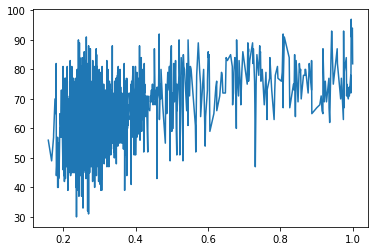

In [14]:
plt.plot(data.groupby('Явка')['Беглов Александр Дмитриевич'].mean())